In [124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from numpy.linalg import solve


In [125]:
def calcTemperature(U):
    T = 25.1414 * U * 1000 + 23.2773
    return T
def calcVoltage(T):
    U = (T-23.2773)/(25.1414*1000)
    return U

In [126]:
#Schnittgerade berechnen
def line_intersection(line1, line2):
    zaehler = line2[1]-line1[1]
    nenner = line1[0]-line2[0]
    if nenner == 0:
        raise Exception('lines do not intersect')

    x = zaehler/nenner
    y = line1[0] * x + line1[0]
    return x, y


In [127]:
with open('data0003.dat') as data:
    T1Abkuehlen = 23.2773 + 25.1414 * 1000 * np.loadtxt(data, usecols= 0)
with open('data0003.dat') as data:
    R1Abkuelen = np.loadtxt(data, usecols= 1)

with open('data0002.dat') as data:
    T2Aufwaermen = 23.2773 + 25.1414 * 1000 * np.loadtxt(data, usecols= 0)
with open('data0002.dat') as data:
    R2Aufwaermen = np.loadtxt(data, usecols= 1)


In [128]:
calcVoltage(180)



0.006233650472925135

In [129]:
#Parameters Abkuelen
NormalbereichT1 = T1Abkuehlen[26705:31870]
AbkuehlungsbereichT1 = T1Abkuehlen[32769: 33089]
NormalbereichR1 = R1Abkuelen[26705:31870]
AbkuehlungsbereichR1 = R1Abkuelen[32769: 33089]
linear_model, cov=np.polyfit(NormalbereichT1, NormalbereichR1,1,cov=True)
print(linear_model)
linear_model_fn=np.poly1d(linear_model)
print(linear_model_fn)
x_fit = np.arange(T1Abkuehlen[len(T1Abkuehlen)-1],T1Abkuehlen[26705])
linear_model_abkuehlung, covabkuehlung=np.polyfit(AbkuehlungsbereichT1, AbkuehlungsbereichR1,1,cov=True)
linear_model_abkuehlung_fn=np.poly1d(linear_model_abkuehlung)
x_fit_abkuehlung= np.arange(T1Abkuehlen[33210],T1Abkuehlen[31875])
print(cov)

#Parameters Aufwaermen
NormalbereichT2 = T2Aufwaermen[4589:]
AbkuehlungsbereichT2 = T2Aufwaermen[1927: 2951]
NormalbereichR2 = R2Aufwaermen[4589:]
AbkuehlungsbereichR2 = R2Aufwaermen[1927: 2951]
linear_model2, cov2=np.polyfit(NormalbereichT2, NormalbereichR2,1,cov=True)
linear_model2_fn=np.poly1d(linear_model2)
x_fit2 = np.arange(T2Aufwaermen[1475],T2Aufwaermen[len(T2Aufwaermen)-1])
linear_model2_abkuehlung, cov2abkuehlung=np.polyfit(AbkuehlungsbereichT2, AbkuehlungsbereichR2,1,cov=True)
linear_model2_abkuehlung_fn=np.poly1d(linear_model2_abkuehlung)
x_fit2_abkuehlung= np.arange(T2Aufwaermen[1475],T2Aufwaermen[3703])

[1.21692405e-05 2.78188870e-04]
 
1.217e-05 x + 0.0002782
[[ 1.03566714e-16 -1.73341893e-14]
 [-1.73341893e-14  2.91584674e-12]]


In [130]:
TC0Abkuehlen = calcTemperature(0.004043189)
TC0Aufwaermen = calcTemperature(0.003254187)

intersection = line_intersection(linear_model,linear_model_abkuehlung)
intersection2 = line_intersection(linear_model2,linear_model2_abkuehlung)

print("Kritische Temperaturen bei Abkühlen der Probe: T_{C,0}",TC0Abkuehlen," und T_{C,Onset}",intersection)
print("Kritische Temperaturen bei Aufwärmen der Probe: T_{C,0}",TC0Aufwaermen," und T_{C,Onset}",intersection2)

Kritische Temperaturen bei Abkühlen der Probe: T_{C,0} 124.9287319246  und T_{C,Onset} (139.83908467030744, 0.0017139046890016472)
Kritische Temperaturen bei Aufwärmen der Probe: T_{C,0} 105.09211704180001  und T_{C,Onset} (127.56036076425266, 0.0018253438698291082)


In [134]:
#Fits
m1 = linear_model[0]
deltam1 = np.sqrt(cov[0][0])
print("Deltam1:",deltam1)
y1 = linear_model[1]
deltay1 = np.sqrt(cov[1][1])
print("Deltay1:",deltay1)
m1abkuehlen = linear_model_abkuehlung[0]
deltam1abkuehlen = np.sqrt(covabkuehlung[0][0])
print("Deltam1abkuehlen:",deltam1abkuehlen)

y1abkuehlen = linear_model_abkuehlung[1]
deltay1abkuehlen = np.sqrt(covabkuehlung[1][1])
print("Deltay1abkuehlen:",deltay1abkuehlen)

dellxnachdellm1 = -(y1abkuehlen-y1)/((m1-m1abkuehlen)**2)
dellxnachdellm1abkuehlen = (y1abkuehlen-y1)/((m1-m1abkuehlen)**2)
dellxnachdelly1 = -1/(m1-m1abkuehlen)
dellxnachdelly1abkuehlen = 1/(m1-m1abkuehlen)

print((dellxnachdellm1*deltam1)**2)
print((dellxnachdellm1abkuehlen*deltam1abkuehlen)**2)
print((dellxnachdelly1+deltay1)**2)
print((dellxnachdelly1abkuehlen+deltay1abkuehlen)**2)
deltaT1 = np.sqrt((dellxnachdellm1*deltam1)**2+(dellxnachdellm1abkuehlen*deltam1abkuehlen)**2+(dellxnachdelly1*deltay1)**2+(dellxnachdelly1abkuehlen*deltay1abkuehlen)**2)

m2 = linear_model2[0]
deltam2 = np.sqrt(cov2[0][0])
y2 = linear_model2[1]
deltay2 = np.sqrt(cov2[1][1])
m2abkuehlen = linear_model2_abkuehlung[0]
deltam2abkuehlen = np.sqrt(cov2abkuehlung[0][0])
y2abkuehlen = linear_model2_abkuehlung[1]
deltay2abkuehlen = np.sqrt(cov2abkuehlung[1][1])

dellxnachdellm2 = -(y2abkuehlen-y2)/((m2-m2abkuehlen)**2)
dellxnachdellm2abkuehlen = (y2abkuehlen-y2)/((m2-m2abkuehlen)**2)
dellxnachdelly2 = -1/(m2-m2abkuehlen)
dellxnachdelly2abkuehlen = 1/(m2-m2abkuehlen)

deltaT2 = np.sqrt((dellxnachdellm2*deltam2)**2+(dellxnachdellm2abkuehlen*deltam2abkuehlen)**2+(dellxnachdelly2*deltay2)**2+(dellxnachdelly2abkuehlen*deltay2abkuehlen)**2)

print("Ungenauigkeit der Temperatur abkühlender Probe:", deltaT1)
print("Ungenauigkeit der Temperatur aufwärmender Probe:", deltaT2)

Deltam1: 1.0176773238791948e-08
Deltay1: 1.7075850607404904e-06
Deltam1abkuehlen: 7.608616674102335e-07
Deltay1abkuehlen: 0.00010028520367673102
0.00013797255937741788
0.771230035329241
68126390.61995117
68126388.93628049
Ungenauigkeit der Temperatur abkühlender Probe: 1.2069474225557884
Ungenauigkeit der Temperatur aufwärmender Probe: 0.28213295382968007


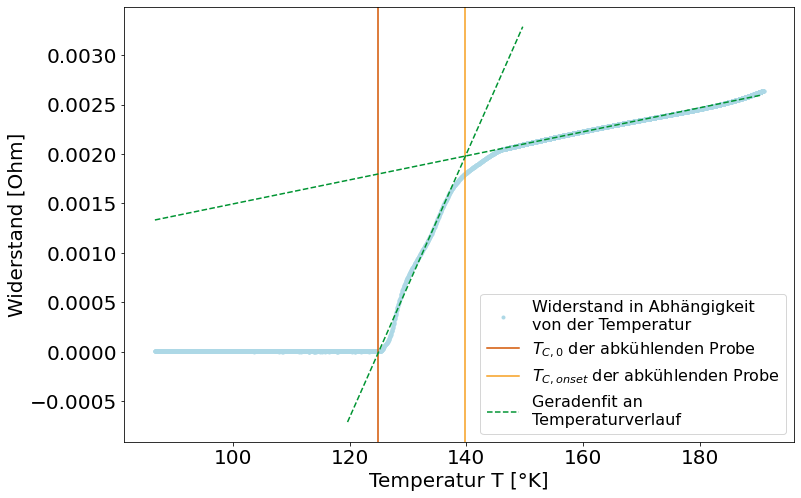

In [132]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Plot Abkuehlen
fig, ax = plt.subplots(figsize=(12,8))

#Name for axis
ax.set_xlabel('Temperatur T [°K]', fontsize=20)
ax.set_ylabel('Widerstand [Ohm]', fontsize=20)
#Plot
ax.plot(T1Abkuehlen[26705:], R1Abkuelen[26705:],'o',markersize=3, color = "lightblue",label = "Widerstand in Abhängigkeit \nvon der Temperatur")
#T0 plot
ax.axvline(TC0Abkuehlen, 0, 1, linestyle = '-', color="#d35400", label='$T_{C,0}$ der abkühlenden Probe')
#TC onset
ax.axvline(intersection[0], 0, 1, linestyle = '-', color="#F79F1F", label='$T_{C,onset}$ der abkühlenden Probe')


#Fitplot
ax.plot(x_fit,linear_model_fn(x_fit), linestyle = '--', color="#009432",label='Geradenfit an \nTemperaturverlauf')
ax.plot(x_fit_abkuehlung, linear_model_abkuehlung_fn(x_fit_abkuehlung), linestyle = '--', color="#009432")

ax.legend(fontsize=16, loc='lower right')

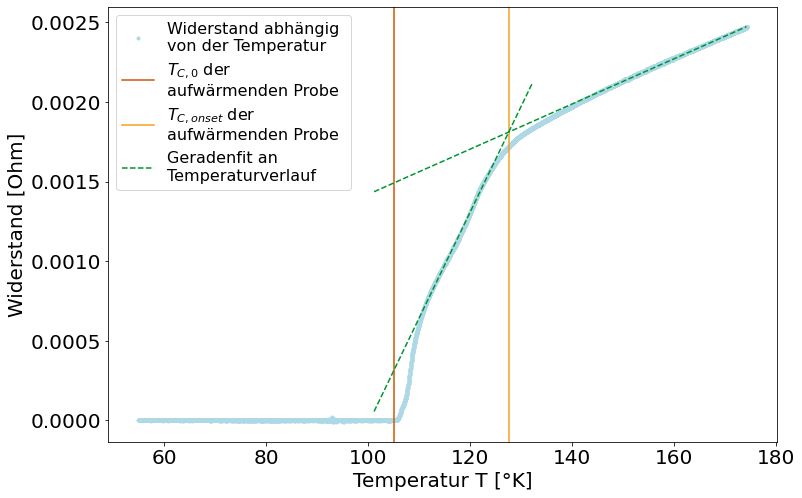

In [133]:
#Plot Abkuehlen
fig, ax = plt.subplots(figsize=(12,8))

#Name for axis
ax.set_xlabel('Temperatur T [°K]', fontsize=20)
ax.set_ylabel('Widerstand [Ohm]', fontsize=20)
#Plot
ax.plot(T2Aufwaermen, R2Aufwaermen,'o',markersize=3, color = "lightblue",label = "Widerstand abhängig \nvon der Temperatur")
#T0 plot
ax.axvline(TC0Aufwaermen, 0, 1, linestyle = '-', color="#d35400", label='$T_{C,0}$ der \naufwärmenden Probe')
#TC onset
ax.axvline(intersection2[0], 0, 1, linestyle = '-', color="#F79F1F", label='$T_{C,onset}$ der \naufwärmenden Probe')


#Fitplot
ax.plot(x_fit2,linear_model2_fn(x_fit2), linestyle = '--', color="#009432",label='Geradenfit an \nTemperaturverlauf')
ax.plot(x_fit2_abkuehlung, linear_model2_abkuehlung_fn(x_fit2_abkuehlung), linestyle = '--', color="#009432")

ax.legend(fontsize=16, loc=2)